## Assignment 6
Damion Huppert

##### Question 1

Power alg:
1) Pick random $c_o$
2) until convergance run 
  $$b_k = \frac{A \cdot b_{k-1} }{||A \cdot b_{k-1} ||}$$

A is rank 1 so it can be expressed as $ A = \lambda_1 \, v_1 v_1^T $ so we already know $v_1$ and the alg will converge right away


##### Question 2

In [9]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import eigs

edges_file = open('wisconsin_edges.csv', "r")
nodes_file = open('wisconsin_nodes.csv', "r")

# create a dictionary where nodes_dict[i] = name of wikipedia page
nodes_dict = {}
for line in nodes_file:
    nodes_dict[int(line.split(',',1)[0].strip())] = line.split(',',1)[1].strip()

node_count = len(nodes_dict)

# create adjacency matrix
A = np.zeros((node_count, node_count))
for line in edges_file:
    from_node = int(line.split(',')[0].strip())
    to_node = int(line.split(',')[1].strip())
    A[to_node, from_node] = 1.0

## Add code below to (1) prevent traps and (2) find the most important pages     
# Hint -- instead of computing the entire eigen-decomposition of a matrix X using
# s, E = np.linalg.eig(A)
# you can compute just the first eigenvector with:
# s, E = eigs(csc_matrix(A), k = 1)

# prevent traps
A[A == 0] = 0.0001

# normalize A
col_sums = A.sum(axis=0)
A = A / col_sums

# most important pages
s, E = eigs(csc_matrix(A), k = 10)
principal_index = np.argmax(np.abs(s))
principal_eigvec = E[:, principal_index].real
ranking = np.argsort(-principal_eigvec)
print("Top 10 pages:")
rank = 1 
for i in ranking[:10]:
    print(f"Rank {rank}: {nodes_dict[i]}")
    rank+=1

Top 10 pages:
Rank 1: "Flambeau, Wisconsin"
Rank 2: "Wisconsin Office of State Employment Relations"
Rank 3: "University of Wisconsin (disambiguation)"
Rank 4: "Sacred Heart College (Wisconsin)"
Rank 5: "Alpine Valley Resort (Wisconsin)"
Rank 6: "United States Post Office and Courthouse (Eau Claire, Wisconsin)"
Rank 7: "Christiana, Wisconsin"
Rank 8: "Wisconsin State University Conference"
Rank 9: "List of casinos in Wisconsin"
Rank 10: "2011 Wisconsin Act 23"


##### Question 3

A: Convex because lines between all point are contained int the set  
B: Not convex because a line between $x_4$ and $x_1$ is not contained in the set  
C: Convex because lines between all point are contained int the set  
D: Not convex because a line between $x_4$ and $x_1$ is not contained in the set 

##### Question 4-a

A: Not convex because the points on the line between $x_3$ and $x_4$ is not greater than the point that is on the line  
B: Convex becusae any line between two points is greater than the point on the line  
C: Convex becusae any line between two points is greater than the point on the line  
D: Not convex becasue the points on the line between $x_1$ and $x_3$ is not greater than the point that is on the line  

##### Question 4-b

Scalability means that any point multiplied by a number is a scaled version of the point so its on a line, lines are convex ✅  
The triangle inequality states that the sum of two points is less than the individual sums of each point, so that satisfies the form: 
$$ 
\lVert u + v\rVert 
\;\le\; 
\lVert u\rVert + \lVert v\rVert \quad ✅
 $$

##### Question 5

In [10]:
## Prepare workspace
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
X = loadmat("BreastCancer.mat")['X']
y = loadmat("BreastCancer.mat")['y']
# Provided function for LASSO
def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X


##### 5-a-b-c

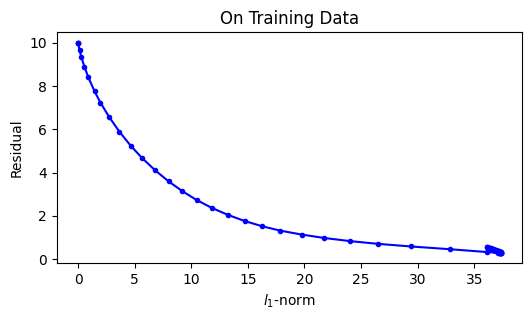

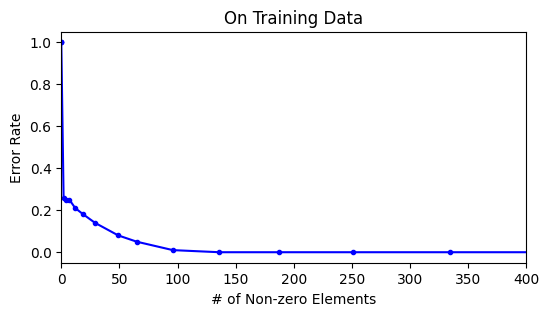

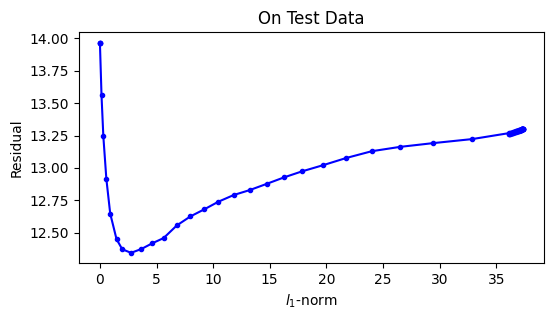

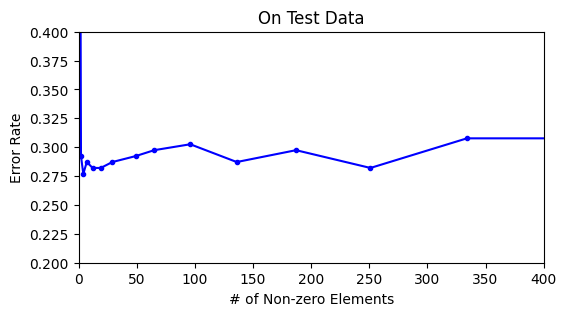

In [11]:
At = X[:100, :]
bt = y[:100, :]

Av = X[100:, :]
bv = y[100:, :]

lam_vals = np.logspace(-6,2,num=80)

number = lam_vals.shape[0]
W = ista_solve_hot(At,bt,lam_vals);

err = []
res = []
norm = []
nonz = []
errv = []
resv = []
for i in range(number):
    err.append(np.mean(np.sign(At@W[:,i:i+1])!=bt))
    res.append(np.linalg.norm(At@W[:,i:i+1]-bt))
    norm.append(np.linalg.norm(W[:,i], 1))
    nonz.append(np.sum(abs(W[:,i])>1e-8))
    
    errv.append(np.mean(np.sign(Av@W[:,i:i+1])!=bv))
    resv.append(np.linalg.norm(Av@W[:,i:i+1]-bv))

#Display Results    
plt.figure(figsize=(6,3))
plt.plot(norm, res, 'b.-')
plt.xlabel('$l_1$-norm');
plt.ylabel('Residual');
plt.title('On Training Data')
plt.savefig('q1a_res', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(6,3))
plt.plot(nonz,err, 'b.-')
plt.xlim([0,400])
plt.xlabel('# of Non-zero Elements')
plt.ylabel('Error Rate')
plt.title('On Training Data')
plt.savefig('q1a_err', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(6,3))
plt.plot(norm, resv, 'b.-')
plt.xlabel('$l_1$-norm');
plt.ylabel('Residual');
plt.title('On Test Data')
plt.savefig('q1b_res', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(6,3))
plt.plot(nonz, errv, 'b.-')
plt.xlim([0,400])
plt.ylim([0.2,0.4])
plt.xlabel('# of Non-zero Elements')
plt.ylabel('Error Rate')
plt.title('On Test Data')
plt.savefig('q1b_err', dpi=300, bbox_inches='tight')
plt.show()

For plot 1, as $||w||$ increases the residual decreases

For plot 2, the error rate greatly decreses initially then only slowly gets lower after the first drop

For plot 3, the residual get small for a low $||w||$ but increases as it grows mayde signifying the model overfit as $||w||$ got larger and doesnt predict as well on the test data  

For plot 4, we see the error rate does not improve when we have more non-zero elements, so the data can be predicted with a low rank model